<a href="https://colab.research.google.com/github/SauloHenriqueAguiar/backtestBacktrading/blob/main/fastquant/SMAeRSIEtherDaytrader20202021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Backtest usando fastquant

In [1]:
#instalando fastquant
!pip install fastquant

     |████████████████████████████████| 5.3 MB 1.2 MB/s 
     |████████████████████████████████| 156 kB 49.3 MB/s 
     |████████████████████████████████| 1.5 MB 30.4 MB/s 
     |████████████████████████████████| 2.2 MB 23.3 MB/s 
     |████████████████████████████████| 503 kB 46.1 MB/s 
     |████████████████████████████████| 410 kB 53.1 MB/s 
     |████████████████████████████████| 138 kB 49.2 MB/s 
     |████████████████████████████████| 97 kB 6.3 MB/s 
     |████████████████████████████████| 191 kB 36.6 MB/s 
     |████████████████████████████████| 6.3 MB 13.9 MB/s 
     |████████████████████████████████| 843 kB 42.3 MB/s 
     |████████████████████████████████| 271 kB 50.5 MB/s 
     |████████████████████████████████| 3.6 MB 14.2 MB/s 
     |████████████████████████████████| 1.1 MB 38.9 MB/s 
     |████████████████████████████████| 160 kB 47.0 MB/s 
     |████████████████████████████████| 291 kB 52.0 MB/s 
     |████████████████████████████████| 192 kB 52.9 MB/s 
     |███████████

#Pega dados da Binance

In [3]:
# preço do bitcoin
from fastquant import get_crypto_data

crypto = get_crypto_data("ETH/USDT", 
                         "2020-10-01", 
                         "2021-10-31",
                         time_resolution='1d'
                        )

In [4]:
crypto.tail()

,open,high,low,close,volume
dt,,,,,
2021-10-27,4131.52,4307.00,3909.00,3922.00,704604.25000
2021-10-28,3921.99,4295.00,3890.17,4286.02,626378.50550
2021-10-29,4286.01,4460.47,4265.97,4418.89,559231.07691
2021-10-30,4418.89,4434.06,4232.20,4322.68,340223.06900
2021-10-31,4322.68,4399.14,4164.35,4287.21,412856.28930


#Executando Backtesting com conjunto de valores

In [5]:
# Usando Cruzamento de Médias Móveis 
from fastquant import backtest

results = backtest('smac', 
                   crypto, 
                   fast_period=[7,14,21,28], 
                   slow_period=[30,45,60,75],
                   plot=False,
                   verbose=False
                  )

In [6]:
#tabela de resultados
results.head()

,strat_id,init_cash,buy_prop,sell_prop,fractional,slippage,single_position,commission,stop_loss,stop_trail,take_profit,execution_type,channel,symbol,allow_short,short_max,add_cash_amount,add_cash_freq,invest_div,fast_period,slow_period,rtot,ravg,rnorm,rnorm100,len,drawdown,moneydown,max,maxdrawdown,maxdrawdownperiod,sharperatio,pnl,final_value,total,win_rate,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,12,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,28,30,1.991008,0.005028,2.550204,255.020414,56,21.047066,195212.26,"{'len': 112, 'drawdown': 49.71205385015428, 'm...",49.712054,112,1.107820,632291.17,732291.17,11,0.636364,7.0,3.0,92853.032857,92.853033,-36620.853333,-36.620853,181014.30,181.01430,-70205.94,-70.20594
1,2,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,60,0.822236,0.002076,0.687488,68.748765,56,4.255619,10114.44,"{'len': 112, 'drawdown': 49.63293891454635, 'm...",49.632939,112,0.984321,127558.14,227558.14,3,0.666667,2.0,0.0,44902.590000,44.902590,0.000000,0.000000,46174.80,46.17480,0.00,0.00000
2,13,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,28,45,0.718574,0.001815,0.579762,57.976212,56,13.674808,32497.98,"{'len': 112, 'drawdown': 49.35320123870941, 'm...",49.353201,112,0.980980,105150.54,205150.54,3,0.666667,2.0,0.0,49612.860000,49.612860,0.000000,0.000000,50886.00,50.88600,0.00,0.00000
3,9,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,21,45,0.680226,0.001718,0.541677,54.167703,173,15.578994,36434.02,"{'len': 173, 'drawdown': 49.73583199154115, 'm...",49.735832,173,0.979473,97432.30,197432.30,3,0.666667,2.0,0.0,38199.400000,38.199400,0.000000,0.000000,47689.04,47.68904,0.00,0.00000
4,4,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,14,30,0.546586,0.001380,0.415988,41.598786,173,19.142775,40894.54,"{'len': 173, 'drawdown': 49.58596700608827, 'm...",49.585967,173,0.972503,72734.57,172734.57,5,0.600000,3.0,1.0,20054.270000,20.054270,-15923.840000,-15.923840,29142.42,29.14242,-15923.84,-15.92384


ROI de 632,29%

In [11]:
#pega os melhores parâmetros da linha superior(anterior)
fast_best, slow_best = results.iloc[0][["fast_period","slow_period"]]
fast_best, slow_best

(28, 30)

#Roda o Backtest usando os valores ótimos encontrados anteriormente

In [12]:
import matplotlib as pl
pl.style.use("default")
pl.rcParams["figure.figsize"] = (9,5)

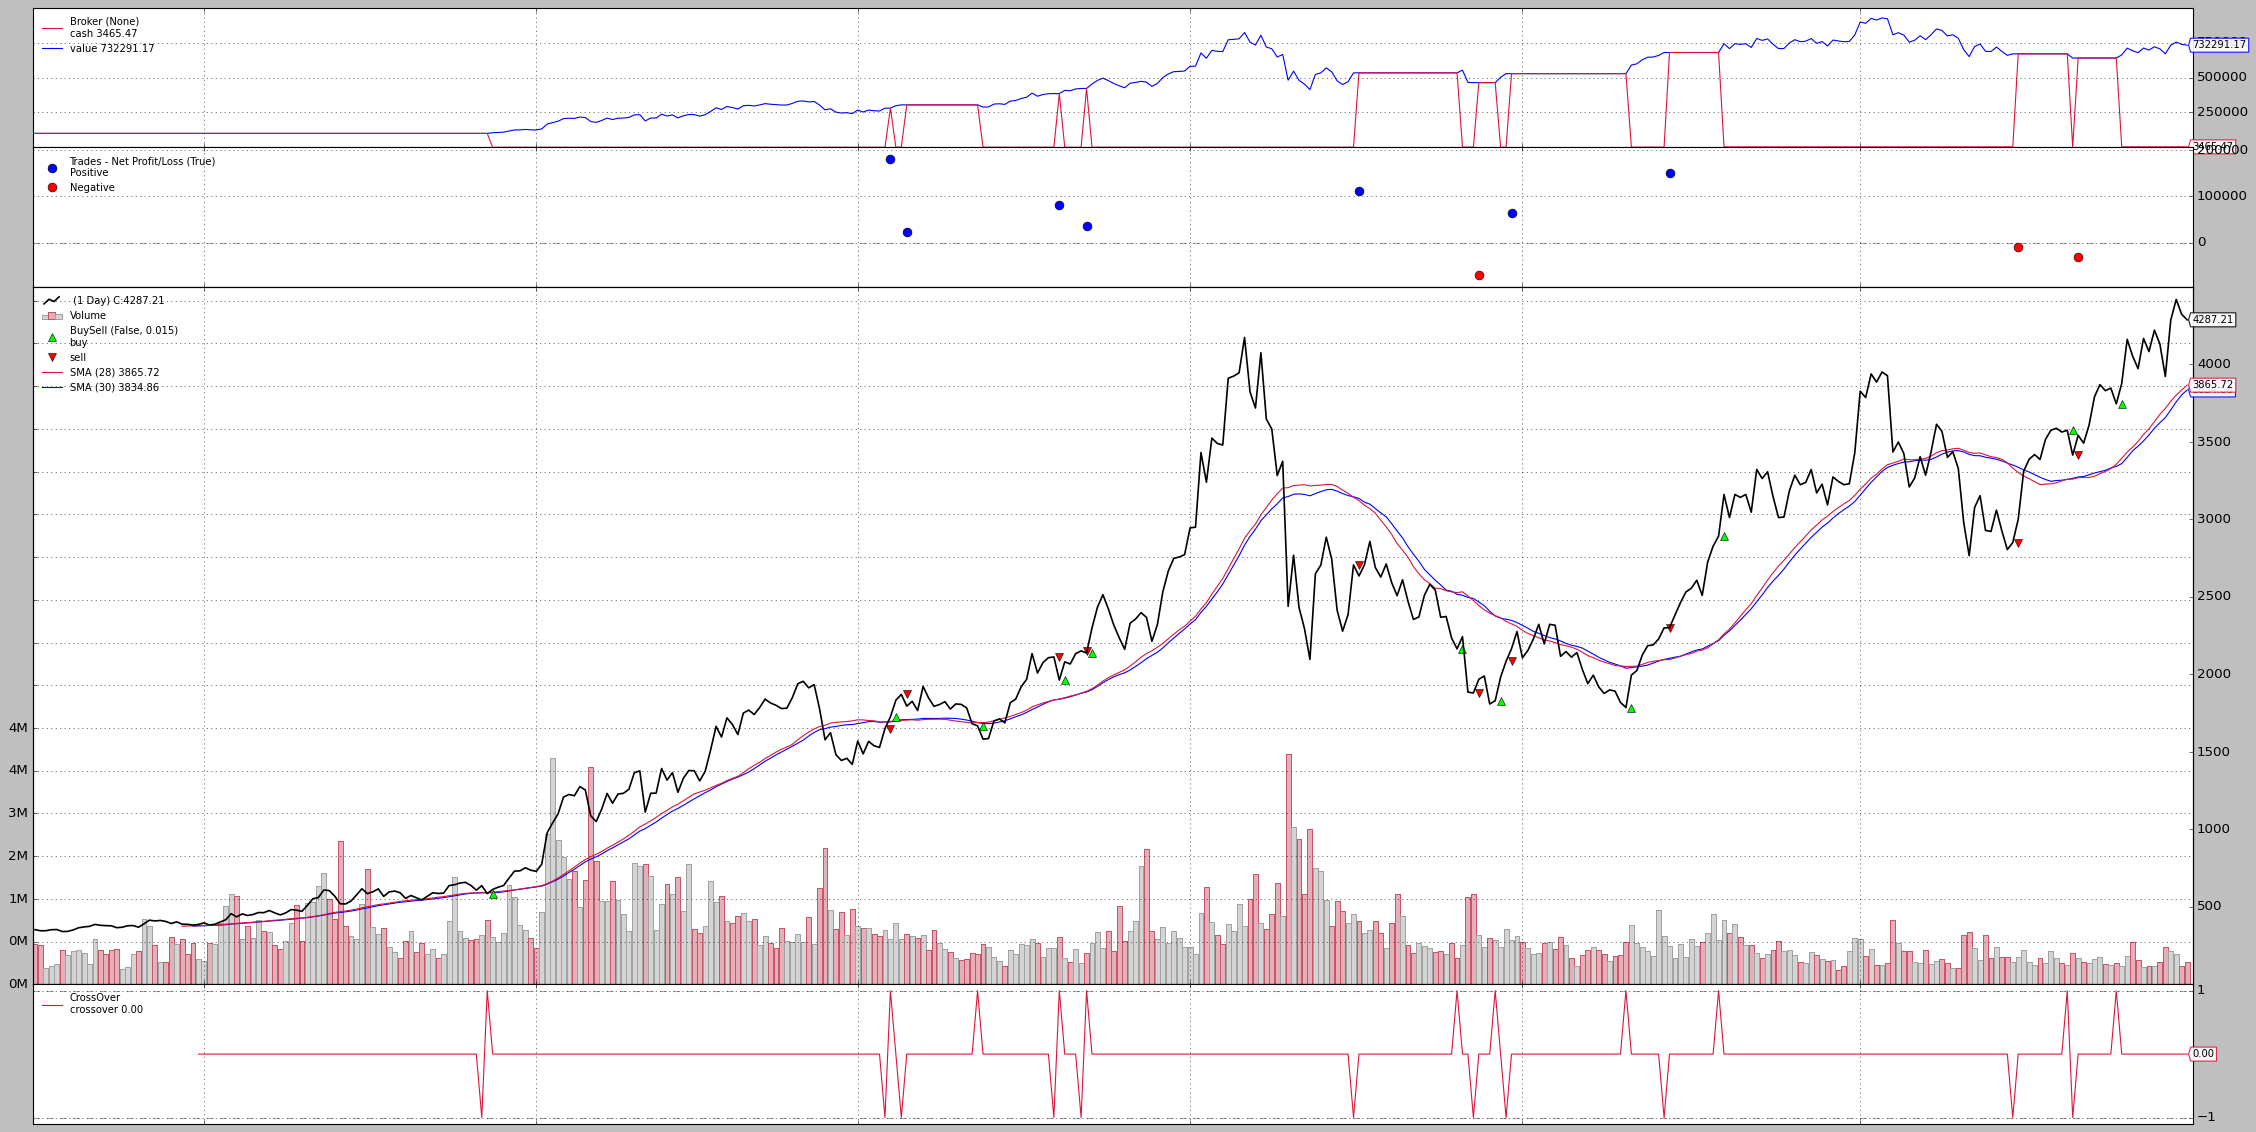

In [13]:
#mostra resultados com novos valores otimizados
results = backtest('smac', 
                   crypto, 
                   fast_period=fast_best, 
                   slow_period=slow_best,
                   plot=True,
                   verbose=False
                  )

#Acessando histórico de transações
Isso é feito definindo return_history = True.

##Estratégia Simples

In [14]:
results, history = backtest('smac', 
                               crypto, 
                               fast_period=fast_best, 
                               slow_period=slow_best,
                               plot=False,
                               verbose=False,
                               return_history=True
                              )

In [15]:
results

,strat_id,init_cash,buy_prop,sell_prop,fractional,slippage,single_position,commission,stop_loss,stop_trail,take_profit,execution_type,channel,symbol,allow_short,short_max,add_cash_amount,add_cash_freq,invest_div,fast_period,slow_period,rtot,ravg,rnorm,rnorm100,len,drawdown,moneydown,max,maxdrawdown,maxdrawdownperiod,sharperatio,pnl,final_value,total,win_rate,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,0,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,28,30,1.991008,0.005028,2.550204,255.020414,56,21.047066,195212.26,"{'len': 112, 'drawdown': 49.71205385015428, 'm...",49.712054,112,1.10782,632291.17,732291.17,11,0.636364,7,3,92853.032857,92.853033,-36620.853333,-36.620853,181014.3,181.0143,-70205.94,-70.20594


 melhor ROI é de 632,29%

In [16]:
history.keys()

dict_keys(['orders', 'periodic', 'indicators'])

In [17]:
orders = history['orders']
orders

,strat_id,strat_name,dt,type,price,size,value,commission,pnl
0,0,fast_period28_slow_period30,2020-12-24,buy,585.56,170,99545.20,0.0,0.00
1,0,fast_period28_slow_period30,2021-03-07,sell,1650.35,-170,99545.20,0.0,181014.30
2,0,fast_period28_slow_period30,2021-03-08,buy,1726.16,162,279637.92,0.0,0.00
3,0,fast_period28_slow_period30,2021-03-10,sell,1870.51,-162,279637.92,0.0,23384.70
4,0,fast_period28_slow_period30,2021-03-24,buy,1668.08,182,303590.56,0.0,0.00
5,0,fast_period28_slow_period30,2021-04-07,sell,2112.21,-182,303590.56,0.0,80831.66
6,0,fast_period28_slow_period30,2021-04-08,buy,1963.47,196,384840.12,0.0,0.00
7,0,fast_period28_slow_period30,2021-04-12,sell,2151.36,-196,384840.12,0.0,36826.44
8,0,fast_period28_slow_period30,2021-04-13,buy,2137.69,197,421124.93,0.0,0.00
9,0,fast_period28_slow_period30,2021-06-01,sell,2706.15,-197,421124.93,0.0,111986.62


O valor final dos resultados pode ser calculado a partir da comissão e pnl (lucro e perda = profit e loss) de todas as transações fechadas (compradas e vendidas) no histórico:

In [18]:
r = results.squeeze()
r.final_value

732291.1699999998

In [19]:
r.init_cash + orders.pnl.sum() - orders.commission.sum()

640108.6699999997

# estratégia de sinal único com pesquisa de grade

In [20]:
results, history = backtest('smac', 
                               crypto, 
                               fast_period=[7,14,21], 
                               slow_period=[30,45,60],
                               plot=False,
                               verbose=False,
                               return_history=True
                              )

In [21]:
orders = history['orders']
orders.strat_id.unique(), orders.strat_name.unique()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array(['fast_period7_slow_period30', 'fast_period7_slow_period45',
        'fast_period7_slow_period60', 'fast_period14_slow_period30',
        'fast_period14_slow_period45', 'fast_period14_slow_period60',
        'fast_period21_slow_period30', 'fast_period21_slow_period45',
        'fast_period21_slow_period60'], dtype=object))

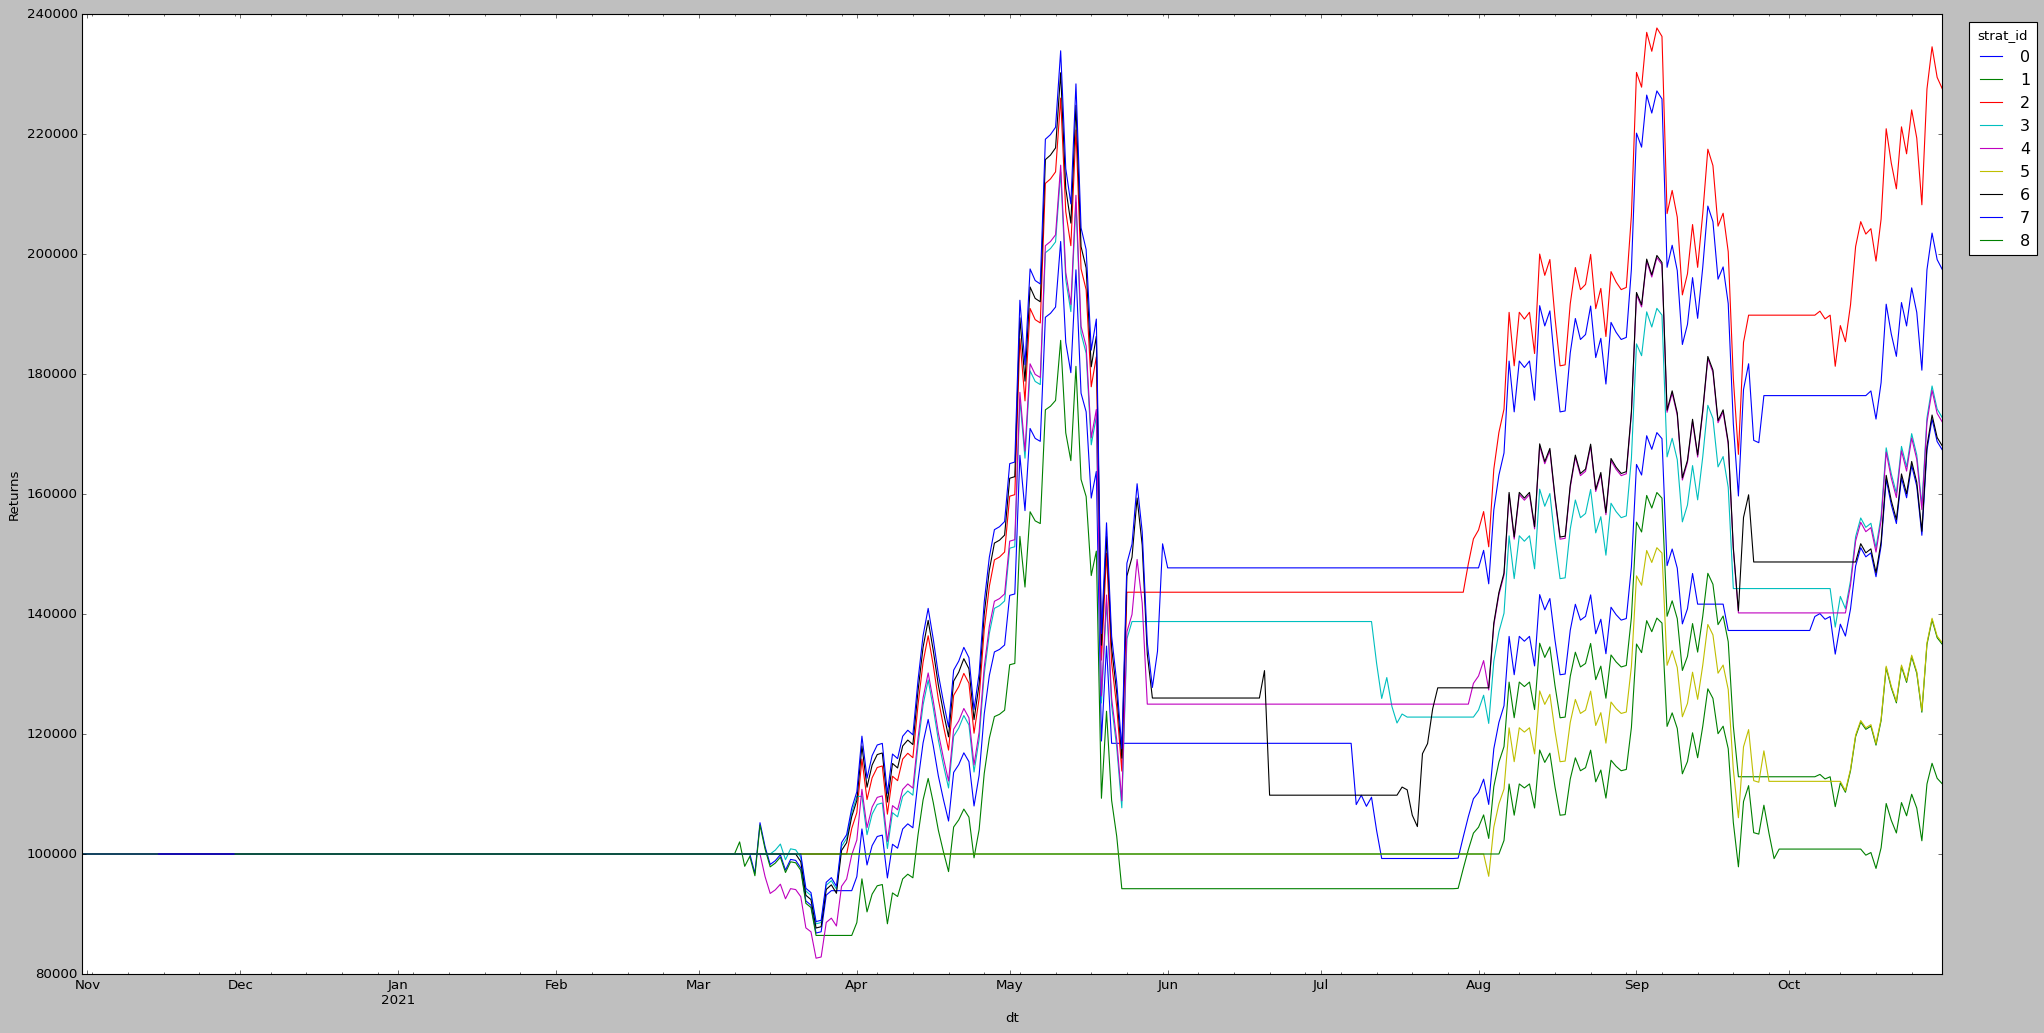

In [22]:
key = 'strat_id'
periodic = history['periodic']
g = periodic.set_index('dt').groupby(key)
axs = g.portfolio_value.plot(legend=key)
axs[0].set_ylabel('Returns')
axs[0].legend(g.groups, title=key, bbox_to_anchor=(1.01, 1), loc='upper left')

# Estratégia multi sinal

In [23]:
# essa estratégia usa varios sinais(Cruzamento de média movel e RSI)
from fastquant import backtest

strats= {
       'smac': {
           'fast_period': 7, 
           'slow_period': 60
            },
        'rsi': {
            'rsi_upper': 70,
            'rsi_lower': 30 
        }
   }
results, history = backtest('multi', 
                               crypto, 
                               strats=strats,
                               plot=False,
                               verbose=False,
                               return_history=True
                              )

2021-10-31T00:00:00, ===Global level arguments===
2021-10-31T00:00:00, init_cash : 100000
2021-10-31T00:00:00, buy_prop : 1
2021-10-31T00:00:00, sell_prop : 1
2021-10-31T00:00:00, commission : 0
2021-10-31T00:00:00, stop_loss : 0
2021-10-31T00:00:00, stop_trail : 0
2021-10-31T00:00:00, take_profit : 0
===Strategy level arguments===
fast_period : 7
slow_period : 60
2021-10-31T00:00:00, ===Global level arguments===
2021-10-31T00:00:00, init_cash : 100000
2021-10-31T00:00:00, buy_prop : 1
2021-10-31T00:00:00, sell_prop : 1
2021-10-31T00:00:00, commission : 0
2021-10-31T00:00:00, stop_loss : 0
2021-10-31T00:00:00, stop_trail : 0
2021-10-31T00:00:00, take_profit : 0
===Strategy level arguments===
rsi_period : 14
rsi_upper : 70
rsi_lower : 30
2021-03-30T00:00:00, BUY CREATE, 1840.46
2021-03-30T00:00:00, Cash: 100000.0
2021-03-30T00:00:00, Price: 1840.46
2021-03-30T00:00:00, Buy prop size: 54.27996256376118
2021-03-30T00:00:00, Afforded size: 54.27996256376118
2021-03-30T00:00:00, Final size:

In [24]:
results

,strat_id,init_cash,buy_prop,sell_prop,smac.fractional,smac.slippage,smac.single_position,smac.commission,smac.stop_loss,smac.stop_trail,smac.take_profit,execution_type,smac.channel,smac.symbol,smac.allow_short,smac.short_max,smac.add_cash_amount,smac.add_cash_freq,smac.invest_div,smac.fast_period,smac.slow_period,rsi.fractional,rsi.slippage,rsi.single_position,rsi.commission,rsi.stop_loss,rsi.stop_trail,rsi.take_profit,rsi.channel,rsi.symbol,rsi.allow_short,rsi.short_max,rsi.add_cash_amount,rsi.add_cash_freq,rsi.invest_div,rsi.rsi_period,rsi.rsi_upper,rsi.rsi_lower,rtot,ravg,rnorm,rnorm100,len,drawdown,moneydown,max,maxdrawdown,maxdrawdownperiod,sharperatio,pnl,final_value,total,win_rate,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,0,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,60,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,70,30,0.394379,0.000996,0.285269,28.52695,2,2.929604,4477.12,"{'len': 118, 'drawdown': 6.944836750215808, 'm...",6.944837,118,0.958632,48346.26,148346.26,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ROI de 48,35%

In [26]:
orders = history['orders']
orders.strat_id.unique(), orders.strat_name.unique()

(array([0]),
 array(['smac.fast_period7_slow_period60', 'rsi.rsi_upper70_rsi_lower30'],
       dtype=object))

In [27]:
from fastquant import backtest

strats= {
       'smac': {
           'fast_period': [7,14], 
           'slow_period': [30,60]
            },
        'rsi': {
            'rsi_upper': [70,80],
            'rsi_lower': [20,30] 
        }
   }
results, history = backtest('multi', 
                               crypto, 
                               strats=strats,
                               plot=False,
                               verbose=False,
                               return_history=True
                              )

2021-10-31T00:00:00, ===Global level arguments===
2021-10-31T00:00:00, init_cash : 100000
2021-10-31T00:00:00, buy_prop : 1
2021-10-31T00:00:00, sell_prop : 1
2021-10-31T00:00:00, commission : 0
2021-10-31T00:00:00, stop_loss : 0
2021-10-31T00:00:00, stop_trail : 0
2021-10-31T00:00:00, take_profit : 0
===Strategy level arguments===
fast_period : 7
slow_period : 30
2021-10-31T00:00:00, ===Global level arguments===
2021-10-31T00:00:00, init_cash : 100000
2021-10-31T00:00:00, buy_prop : 1
2021-10-31T00:00:00, sell_prop : 1
2021-10-31T00:00:00, commission : 0
2021-10-31T00:00:00, stop_loss : 0
2021-10-31T00:00:00, stop_trail : 0
2021-10-31T00:00:00, take_profit : 0
===Strategy level arguments===
rsi_period : 14
rsi_upper : 70
rsi_lower : 20
2021-03-11T00:00:00, BUY CREATE, 1825.78
2021-03-11T00:00:00, Cash: 100000.0
2021-03-11T00:00:00, Price: 1825.78
2021-03-11T00:00:00, Buy prop size: 54.71639512980748
2021-03-11T00:00:00, Afforded size: 54.71639512980748
2021-03-11T00:00:00, Final size:

In [28]:
orders = history['orders']
orders.strat_id.unique(), orders.strat_name.unique()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 array(['smac.fast_period7_slow_period30', 'rsi.rsi_upper70_rsi_lower20',
        'rsi.rsi_upper70_rsi_lower30', 'rsi.rsi_upper80_rsi_lower20',
        'rsi.rsi_upper80_rsi_lower30', 'smac.fast_period7_slow_period60',
        'smac.fast_period14_slow_period30',
        'smac.fast_period14_slow_period60'], dtype=object))

In [29]:
results

,strat_id,init_cash,buy_prop,sell_prop,smac.fractional,smac.slippage,smac.single_position,smac.commission,smac.stop_loss,smac.stop_trail,smac.take_profit,execution_type,smac.channel,smac.symbol,smac.allow_short,smac.short_max,smac.add_cash_amount,smac.add_cash_freq,smac.invest_div,smac.fast_period,smac.slow_period,rsi.fractional,rsi.slippage,rsi.single_position,rsi.commission,rsi.stop_loss,rsi.stop_trail,rsi.take_profit,rsi.channel,rsi.symbol,rsi.allow_short,rsi.short_max,rsi.add_cash_amount,rsi.add_cash_freq,rsi.invest_div,rsi.rsi_period,rsi.rsi_upper,rsi.rsi_lower,rtot,ravg,rnorm,rnorm100,len,drawdown,moneydown,max,maxdrawdown,maxdrawdownperiod,sharperatio,pnl,final_value,total,win_rate,won,lost,won_avg,won_avg_prcnt,lost_avg,lost_avg_prcnt,won_max,won_max_prcnt,lost_max,lost_max_prcnt
0,7,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,60,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,80,30,1.079049,0.002725,0.987083,98.708289,2,2.953807,8954.24,"{'len': 87, 'drawdown': 13.974639614258876, 'm...",13.974640,87,0.989701,194188.11,294188.11,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,60,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,80,20,1.079049,0.002725,0.987083,98.708289,2,2.953807,8954.24,"{'len': 87, 'drawdown': 13.974639614258876, 'm...",13.974640,87,0.989701,194188.11,294188.11,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,14,30,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,80,30,0.842505,0.002128,0.709395,70.939518,2,2.971114,7110.72,"{'len': 94, 'drawdown': 13.952737691396536, 'm...",13.952738,94,0.984873,132217.70,232217.70,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,14,30,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,80,20,0.842505,0.002128,0.709395,70.939518,2,2.971114,7110.72,"{'len': 94, 'drawdown': 13.952737691396536, 'm...",13.952738,94,0.984873,132217.70,232217.70,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,30,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,80,30,0.813718,0.002055,0.678366,67.836618,2,2.945410,6847.36,"{'len': 30, 'drawdown': 17.476194884406933, 'm...",17.476195,30,0.984080,125628.22,225628.22,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,30,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,80,20,0.813718,0.002055,0.678366,67.836618,2,2.945410,6847.36,"{'len': 30, 'drawdown': 17.476194884406933, 'm...",17.476195,30,0.984080,125628.22,225628.22,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,60,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,70,30,0.394379,0.000996,0.285269,28.526950,2,2.929604,4477.12,"{'len': 118, 'drawdown': 6.944836750215808, 'm...",6.944837,118,0.958632,48346.26,148346.26,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,7,60,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,70,20,0.394379,0.000996,0.285269,28.526950,2,2.929604,4477.12,"{'len': 118, 'drawdown': 6.944836750215808, 'm...",6.944837,118,0.958632,48346.26,148346.26,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,15,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,14,60,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,80,30,0.380909,0.000962,0.274300,27.429985,2,2.968152,4477.12,"{'len': 3, 'drawdown': 7.040498736405456, 'mon...",7.040499,3,0.956861,46361.50,146361.50,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,14,100000,1,1,False,0.001,None,0,0,0,0,close,,,False,1.5,0,M,True,14,60,False,0.001,None,0,0,0,0,,,False,1.5,0,M,True,14,80,20,0.380909,0.000962,0.274300,27.429985,2,2.968152,4477.12,"{'len': 3, 'drawdown': 7.040498736405456, 'mon...",7.040499,3,0.956861,46361.50,146361.50,1,NaN,NaN,NaN,NaN

Melhor ROI foi 194,19%